# **2. (Programming) Implement Horner’s method:**

## (a) 
> Given $(x_i, f(x_i)), i=1,\ldots,N+1,$ find the interpolating polynomial.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

We write the polynomial in the following form: 
> This is called **Newton form of interpolating polynomial**.

$$
y=f(x)=a_1+a_2(x−x_1)+a_3(x−x_1)(x−x_2)+\ldots +a_{N+1}\prod^N_{k=1}(x−x_k)
$$

> The idea for obtaining the coefficients $a_i$ is given below: Let $y_i = f(x_i)$. 

1. It is clear that $a_1 = y_1$. 
2. $y_2=a_1+a_2(x_2−x_1)$, by rearranging we get $a_2=\frac{y_2−y_1}{x_2−x_1}$. 
3. Similarly, for $a_3$ we have $y_3 = a_1 + a_2(x_3-x_1) + a_3(x_3-x_1)(x_3-x_2)$. Rearranging gives
  $$
  a_3=\frac{(y_3−y_1)/(x_3−x_1)−(y_2−y_1)/(x_2−x_1)}{x_3−x_2}.
  $$ 
  Further rearrangement, after some tedious algebraic manipulation, the above equation can be transformed into the following 
  $$
  a_3=\frac{(y_3−y_2)/(x_3−x_2)−(y_2−y_1)/(x_2−x_1)}{x_3−x_1}.
  $$ 
  
In fact, these are called *divided differences*, if we define $f[x_2,x_1]=\frac{y_2−y_1}{x_2−x_1}$, then 
$$
f[x_3,x_2,x_1]=\frac{(y_3−y_2)/(x_3−x_2)−(y_2−y_1)/(x_2−x_1)}{x_3−x_1}=\frac {f[x_3,x_2]−f[x_2,x_1]}{x_3−x_1}.
$$
Continuing to write it out, we will have the following iterative equation:
$$
f[x_k,…,x_2,x_1]=\frac{f[x_k,x_{k-1}…x_3,x_2]−f[x_{k−1},x_{k−2},…,x_2,x_1]}{x_k−x_1}.
$$


In [ ]:
# Given (x_i, y_i), i=1:N, to evaluate Newton's divided difference
# The coefficients of Newton's polynpomial is given by 'coeffi(x, y)[0,:]'
def coeffi(x, y):
    n = len(y)
    
    co = np.zeros([n, n])
    co[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            co[i][j] = \
            (co[i+1][j-1] - co[i][j-1]) / (x[i+j]-x[i])
            
    return co

# Given coefficients of Newton's polynomial and grid points, to evaluate p(x). 
def poly(coef, x_d, x):

    n = len(x_d) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_d[n-k])*p
    return p

### Example

Suppose $f(1)=6, f(2)=9, f(3)=2$ and $f(4)=5$, the interpolating polynomial  is given by
$$
p(x) = 6 + 3(x-1) -5 (x-1)(x-2) + \frac{10}{3}(x-1)(x-2)(x-3).
$$
Also we have $p(0)=-27$.

In [ ]:
xi = np.array([1, 2, 3, 4])
yi = np.array([6, 9, 2, 5])

In [ ]:
p_coef = coeffi(xi, yi)[0,:]

print("Coefficients of the polynomial:", p_coef)

Coefficients of the polynomial: [ 6.          3.         -5.          3.33333333]


In [ ]:
print("p(0)= ", poly(p_coef, xi, 0))

p(0)=  -27.0


To visualize the interpolated polynomial, we generate additional points on the polynomial, denoted by (x_new, y_new), and make a graph.

Interpolated data are marked as red dots.

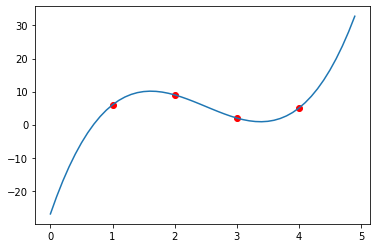

In [ ]:
x_new = np.arange(min(xi)-1, max(xi)+1, .1)
y_new = poly(p_coef, xi, x_new)

plt.figure(figsize = (6, 4))
plt.plot(xi, yi, 'ro')
plt.plot(x_new, y_new)

## (b) 
> Given coefficients of a polynomial in Horner’s form, evaluate the polynomial at a given $x$.

Given a polynomial $p(x) = a_0+a_1x+a_2x^2 \ldots+a_nx^n $, we rewrite it as
$$
p(x) = a_0+x(a_1+x(a_2+x(a_3+x(\cdots +x(a_n))). 
$$
 



In [ ]:
# Given ascending coefficients of a polynomial, to evaluate p(x). 
def horner(A, x):
    p = A[-1]
    i = len(A) - 2
    while i >= 0:
        p = p * x + A[i]
        i -= 1
    return p

### Example

Suppose $f(x) = 1 + 2x + 3x^2$, we have $p(1)=6$.

In [ ]:
A = np.array([1, 2, 3])
print("p(1)= ", horner(A, 1))

p(1)=  6
